In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ipywidgets
from ipywidgets import interact,interact_manual
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
#Reading the dataset
df=pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
#Hanling the categorical feature Ram and weight
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Univariate Analysis

C:\Users\Akhlesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

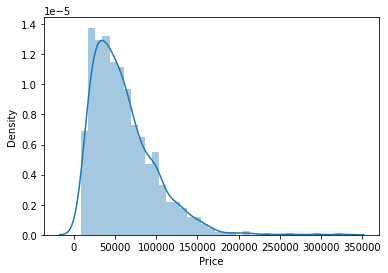

In [14]:
sns.distplot(df['Price'])

<AxesSubplot:>

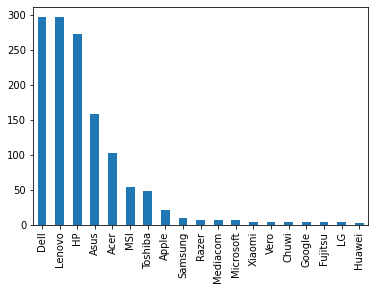

In [15]:
df['Company'].value_counts().plot(kind='bar')

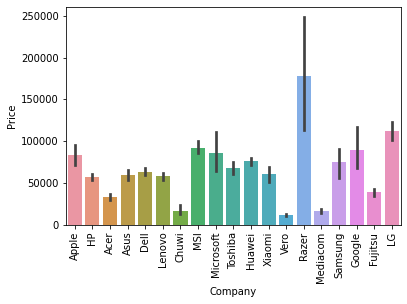

In [16]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

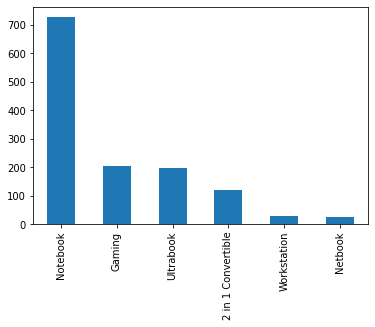

In [17]:
df['TypeName'].value_counts().plot(kind='bar')

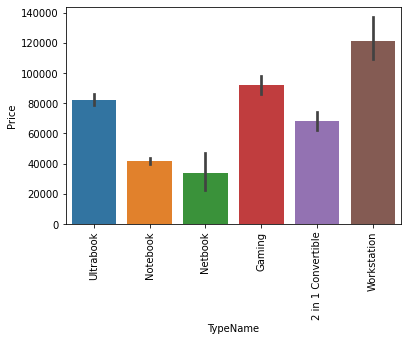

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Akhlesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

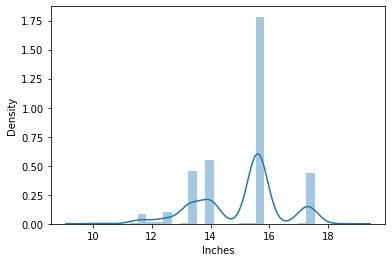

In [19]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

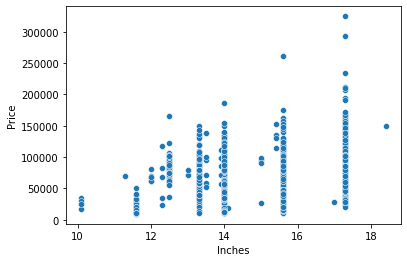

In [20]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [21]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
df['Touchscreen ']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen ' in x else 0)

In [23]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
502,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.4,85194.72,1


<AxesSubplot:>

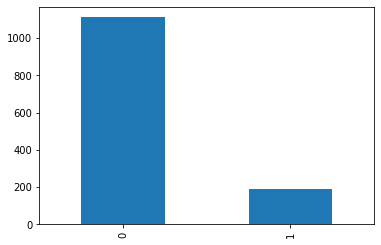

In [24]:
df['Touchscreen '].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen ', ylabel='Price'>

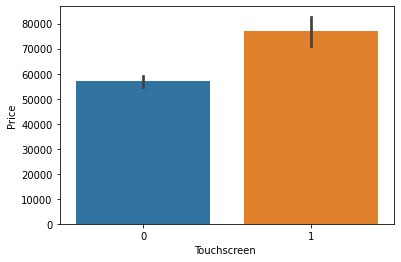

In [25]:
sns.barplot(x=df['Touchscreen '],y=df['Price'])

In [26]:
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

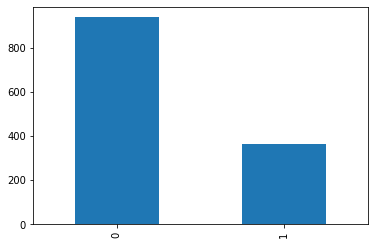

In [28]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

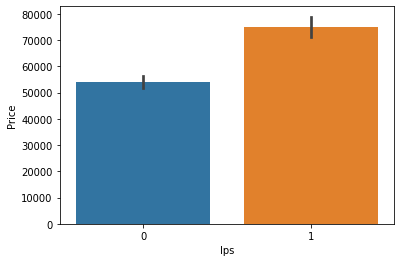

In [29]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [30]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)


In [31]:
df['x_res']=new[0]
df['y_res']=new[1]

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [33]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [34]:
#def get_x(obj):
#    s=str(obj)
#    lists=s.split('  ')
#    lists.reverse()
#    return lists[0]
#
#df['x_res']=df['x_res'].apply(get_x)

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [38]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
x_res           0.556529
y_res           0.552809
Name: Price, dtype: float64

In [39]:
df['ppi']=((df['x_res'])**2 + (df['y_res'])**2)**0.5/df['Inches']

In [40]:
df['ppi']=df['ppi'].astype('float')

In [41]:
df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
x_res           0.556529
y_res           0.552809
ppi             0.473487
Name: Price, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [43]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [44]:
#Droping the columns x_res,y_res,inches from the dataset
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [45]:
df['Cpu'].value_counts().head()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Name: Cpu, dtype: int64

In [46]:
df['CPU name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i5':
        return text
    else:
        if text.split()[0]=='Intel':
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [48]:
df['Cpu brand']=df['CPU name'].apply(fetch_processor)

<AxesSubplot:>

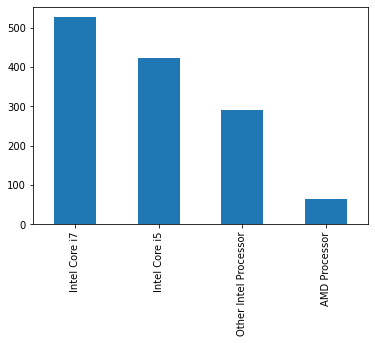

In [49]:
df['Cpu brand'].value_counts().plot(kind='bar')

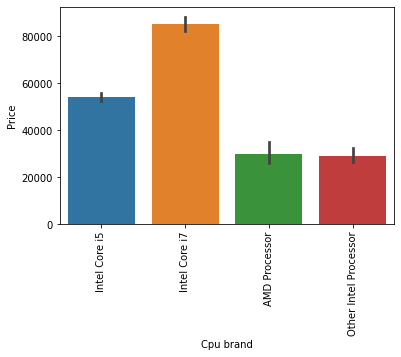

In [50]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
df.drop(columns=['Cpu','CPU name'],inplace=True)

<AxesSubplot:>

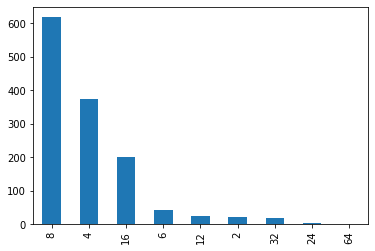

In [52]:
#Summarizing the Ram columns 
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

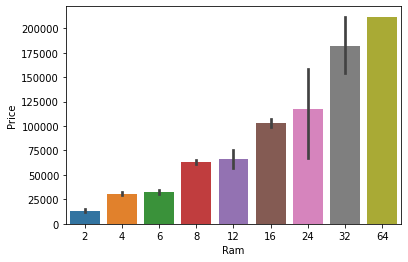

In [53]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [54]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [55]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Akhlesh\AppData\Local\Temp\ipykernel_12668\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Akhlesh\AppData\Local\Temp\ipykernel_12668\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


<AxesSubplot:>

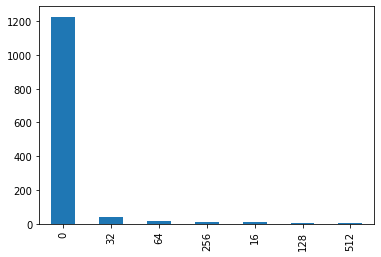

In [57]:
df['Flash_Storage'].value_counts().plot(kind='bar')

In [58]:
df.drop(columns=['Memory'],inplace=True)

In [59]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [60]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [61]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [62]:
df['Gpu'].value_counts().head()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
Name: Gpu, dtype: int64

In [63]:
df['Gpu brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [64]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [65]:
df[df['Gpu brand']=='ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [66]:
df.drop(1191,axis=0,inplace=True)

<AxesSubplot:xlabel='Gpu brand', ylabel='Price'>

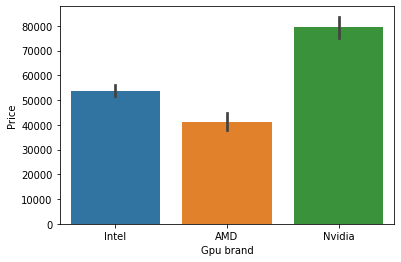

In [67]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])

In [68]:
df.drop(columns=['Gpu'],inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [70]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

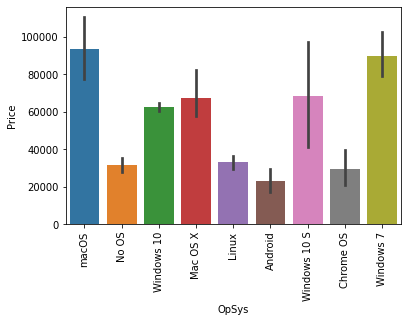

In [71]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
def cat_os(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/NoOS/Linux'

In [73]:
df['OS']=df['OpSys'].apply(cat_os)

In [74]:
df.drop(columns=['OpSys'],inplace=True)

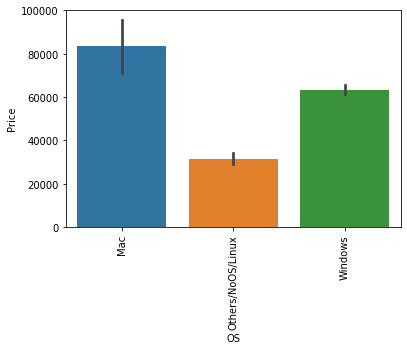

In [75]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Akhlesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

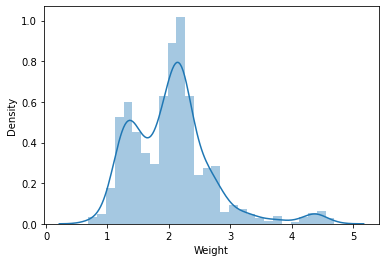

In [76]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

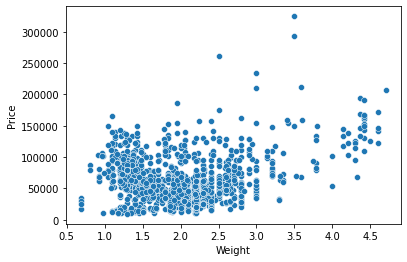

In [77]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [78]:
df.corr()['Price']

Ram             0.742905
Weight          0.209867
Price           1.000000
Touchscreen     0.192917
Ips             0.253320
ppi             0.475368
HDD            -0.096891
SSD             0.670660
Name: Price, dtype: float64

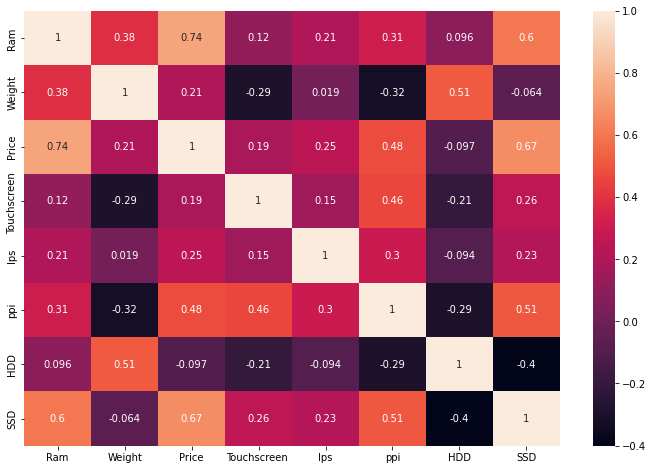

In [79]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(df.corr(),annot=True)
plt.show()

C:\Users\Akhlesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

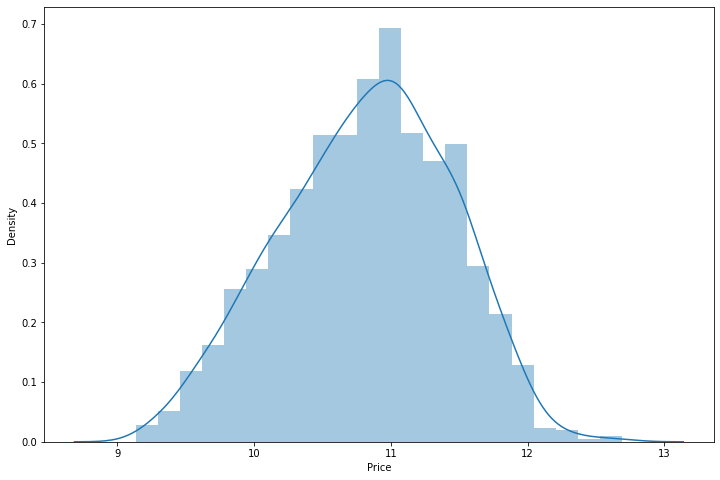

In [80]:
sns.distplot(np.log(df['Price']))

In [81]:
#Creating the independent and the dependent feature 
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [82]:
x.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NoOS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [83]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [85]:
x_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/NoOS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Other Intel Processor,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,GradientBoostingRegressor,
AdaBoostRegressor,ExtraTreesRegressor)
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [87]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),(0,1,7,10,11))],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),
                  ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print('R2 Score:',r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 Score: 0.8083816180100558
MAE: 0.20882046177326646


# Ridge Regression

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2=Ridge(alpha=10)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))            

R2 Score: 0.810254309951281
MAE: 0.20980914072040197


# Lasso Regression

In [89]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=Lasso(alpha=0.001)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 Score: 0.8100315649058705
MAE: 0.20921390155203987


# KNN 

In [90]:
step1=ColumnTransformer(transformers=[('col_tf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 Score: 0.8048911143621811
MAE: 0.1906595727247086


# Decision tree

In [91]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')
step2=DecisionTreeRegressor(max_depth=8)
pipe=Pipeline([('step1',step1),
              ('step2',step2)])
pipe.fit(x_train,y_train)
pipe.predict(x_test)
print("R2 Score:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2 Score: 0.8048911143621811
MAE: 0.1906595727247086


# Random forest

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8883464764275286
MAE 0.1611118004755231


# Extra trees

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              #max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8689294606977847
MAE 0.16279156670539868


# Adaboost 

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7729559149756811
MAE 0.23358145975554256


In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8868316384226338
MAE 0.15855704561207928


In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8869846272548534
MAE 0.16087815993702448


In [97]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb),('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8896634500849272
MAE 0.1598518367788968


In [98]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    #('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.871624313924035
MAE 0.1721385646611569


# Exporting the model

In [99]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [100]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/NoOS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [101]:
x_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/NoOS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Other Intel Processor,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
